<a href="https://colab.research.google.com/github/rulocastellanos/practice_data_science_ml/blob/main/AXON_Stock_Forecasting_with_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('/AXON.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-06-19,0.508333,0.508333,0.460000,0.460000,0.460000,237600
1,2001-06-20,0.458333,0.458333,0.445833,0.445833,0.445833,56400
2,2001-06-21,0.445833,0.445833,0.445833,0.445833,0.445833,7200
3,2001-06-22,0.445833,0.479167,0.445833,0.479167,0.479167,142800
4,2001-06-25,0.479167,0.483333,0.475000,0.479167,0.479167,92400
...,...,...,...,...,...,...,...
5815,2024-08-01,300.000000,302.720001,296.089996,299.630005,299.630005,872700
5816,2024-08-02,294.100006,295.359985,287.140015,292.359985,292.359985,929200
5817,2024-08-05,279.640015,291.750000,279.019989,286.160004,286.160004,684600
5818,2024-08-06,289.399994,298.700012,286.190002,295.000000,295.000000,1068800


In [11]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2001-06-19,0.460000
1,2001-06-20,0.445833
2,2001-06-21,0.445833
3,2001-06-22,0.479167
4,2001-06-25,0.479167
...,...,...
5815,2024-08-01,299.630005
5816,2024-08-02,292.359985
5817,2024-08-05,286.160004
5818,2024-08-06,295.000000


In [12]:
df.Date

,Date
0,2001-06-19
1,2001-06-20
2,2001-06-21
3,2001-06-22
4,2001-06-25
...,...
5815,2024-08-01
5816,2024-08-02
5817,2024-08-05
5818,2024-08-06


In [14]:
import datetime

def str_to_datetime (s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year = year, month = month, day = day)

datetime_object = str_to_datetime('2001-06-19')
datetime_object

datetime.datetime(2001, 6, 19, 0, 0)

In [15]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

,Date
0,2001-06-19
1,2001-06-20
2,2001-06-21
3,2001-06-22
4,2001-06-25
...,...
5815,2024-08-01
5816,2024-08-02
5817,2024-08-05
5818,2024-08-06


In [16]:
df.index = df.pop('Date')
df

,Close
Date,
2001-06-19,0.460000
2001-06-20,0.445833
2001-06-21,0.445833
2001-06-22,0.479167
2001-06-25,0.479167
...,...
2024-08-01,299.630005
2024-08-02,292.359985
2024-08-05,286.160004


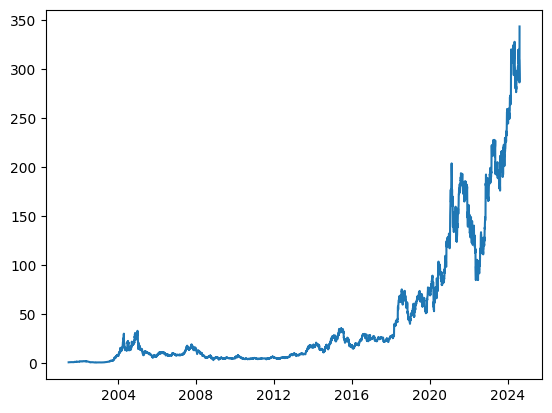

In [17]:
import matplotlib.pyplot as plt

plt.plot(df.index, df.Close)

In [18]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,144.770004,139.619995,133.449997,136.770004
1,2021-03-26,139.619995,133.449997,136.770004,137.820007
2,2021-03-29,133.449997,136.770004,137.820007,134.320007
3,2021-03-30,136.770004,137.820007,134.320007,139.279999
4,2021-03-31,137.820007,134.320007,139.279999,142.419998
...,...,...,...,...,...
247,2022-03-17,120.300003,121.180000,127.300003,131.339996
248,2022-03-18,121.180000,127.300003,131.339996,134.889999
249,2022-03-21,127.300003,131.339996,134.889999,134.369995
250,2022-03-22,131.339996,134.889999,134.369995,137.669998


In [19]:
def windowed_df_to_date_X_y(windowed_df):
  df_as_np = windowed_df.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)


dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

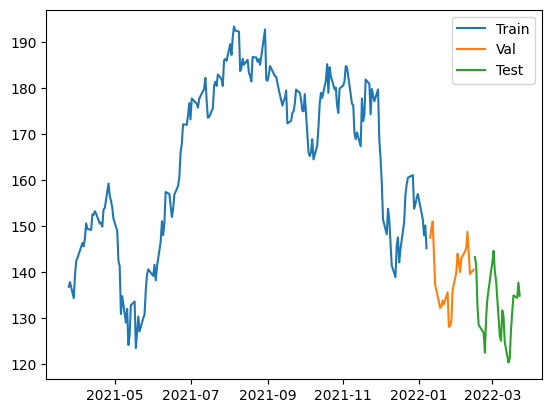

In [20]:
q_80 = int(len(dates)* .8)
q_90 = int(len(dates)* .9)


dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 26661.6914 - mean_absolute_error: 162.2722 - val_loss: 19362.3711 - val_mean_absolute_error: 138.9911
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27191.8359 - mean_absolute_error: 163.9151 - val_loss: 19274.0566 - val_mean_absolute_error: 138.6730
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27239.3848 - mean_absolute_error: 164.0479 - val_loss: 19181.8418 - val_mean_absolute_error: 138.3401
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26928.3535 - mean_absolute_error: 163.0906 - val_loss: 19073.3340 - val_mean_absolute_error: 137.9473
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26772.9629 - mean_absolute_error: 162.6635 - val_loss: 18918.8008 - val_mean_absolute_error: 137.3859
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26366.1191 - mean_absolute_error: 161.3703 - val_loss: 18673.2598 - val_mean_absolute_error: 136.4890
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


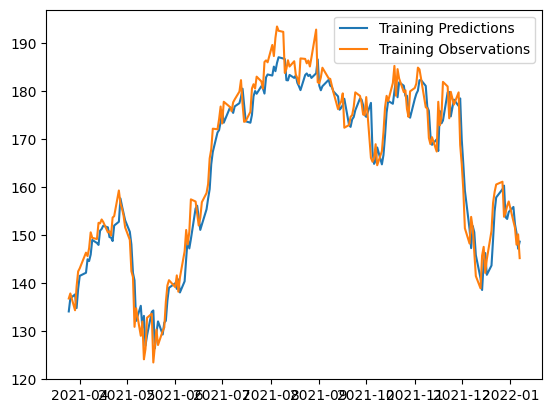

In [24]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


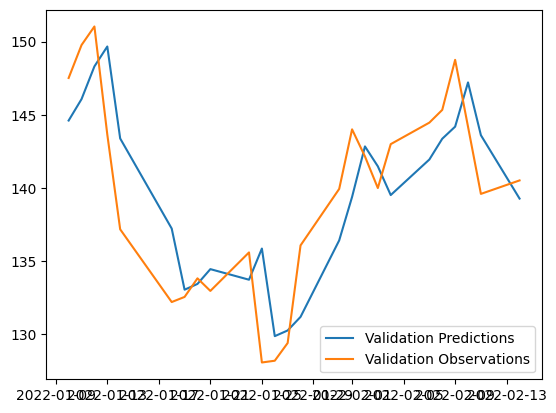

In [25]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


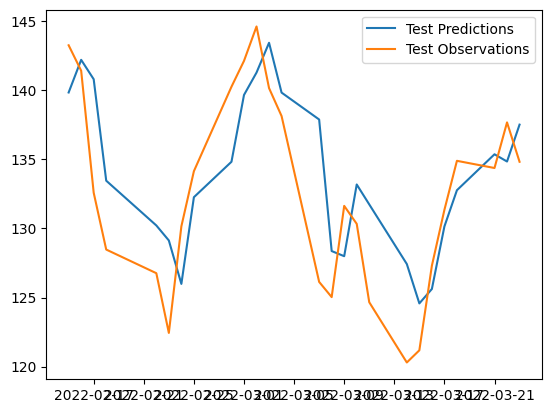

In [26]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])

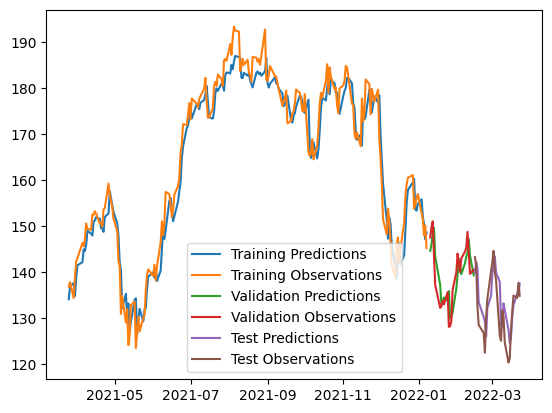

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 'Training Observations',
            'Validation Predictions', 'Validation Observations',
    'Test Predictions', 'Test Observations'])

In [29]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

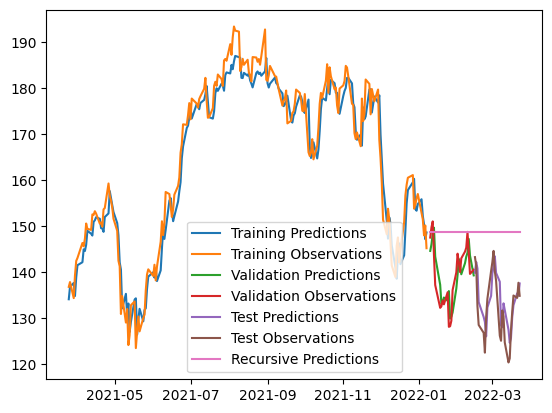

In [30]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 'Training Observations',
            'Validation Predictions', 'Validation Observations',
            'Test Predictions', 'Test Observations',
            'Recursive Predictions'])